In [36]:
#So let's study how to make NN
#Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split # just help us to make train and test dataset 

In [37]:
class my_nn(nn.Module):
  def __init__(self,open_size,input_size1,input_size2,input_size3, n_classes):
      super(my_nn,self).__init__()
      self.fc1 = nn.Linear(open_size,input_size1)
      self.act1 = nn.Sigmoid()
      self.fc2 = nn.Linear(input_size1,input_size2)
      self.act2= nn.Sigmoid()
      self.fc3 = nn.Linear(input_size2,input_size3)
      self.act3 =nn.Sigmoid()
      self.fc4 = nn.Linear(input_size3,n_classes)
  def forward (self,x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    x = self.act3(x)
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Right now you used: {device}")

Right now you used: cpu


In [39]:
mnist_shape = 784  #28x28
input_size1 = 40
input_size2 = 100
input_size3 = 200
n_classes = 10
nn_my = my_nn(mnist_shape,input_size1,input_size2,input_size3,n_classes).to(device)
print(nn_my)

my_nn(
  (fc1): Linear(in_features=784, out_features=40, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=40, out_features=100, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=100, out_features=200, bias=True)
  (act3): Sigmoid()
  (fc4): Linear(in_features=200, out_features=10, bias=True)
)


In [40]:
lr1 = 10**(-3)
print(f"learning_rate: {lr1}")
batch_size1 = 64 # good tone to used batch 
batch_size2 = 8

learning_rate: 0.001


In [41]:
from numpy import genfromtxt
my_data = genfromtxt('sample_data/mnist_train_small.csv', delimiter=',') #default folder in colab

In [42]:
print(my_data.shape)

(20000, 785)


In [43]:
y_real = my_data[:,0]
print(y_real.shape)



(20000,)


In [44]:
X_real = my_data[:,1:785]

print(X_real.shape)


(20000, 784)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, random_state=0)

In [46]:
X_train_t = torch.tensor(X_train/255.0)
Y_train_t = torch.tensor(y_train) 

X_test_t = torch.tensor(X_test/255.0)
Y_test_t = torch.tensor(y_test)
train_dataset = TensorDataset(X_train_t, Y_train_t)
test_dataset = TensorDataset(X_test_t, Y_test_t)

In [47]:
# loss_function = nn.BCEWithLogitsLoss()
loss_function = nn.CrossEntropyLoss()
optimaizer = optim.Adam(nn_my.parameters(),lr = lr1)

In [48]:
#Making data_loader 
train_dataloader = DataLoader(dataset =train_dataset, batch_size=batch_size1,shuffle=True)
test_dataloader = DataLoader(dataset =test_dataset, batch_size=batch_size2,shuffle=True)

In [49]:
def metrics_fn():
   correct_test = 0
   total_test = 0
   correct_train =0
   total_train = 0
   with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        X = X.float()
        y =y.long()

        output = nn_my(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct_test += 1
            total_test += 1
    for data in train_dataloader:
        X, y = data
        X = X.float()
        y =y.long()

        output = nn_my(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct_train += 1
            total_train += 1
   output = nn_my(X.view(-1,784))  
   test_loss = F.nll_loss(output, y)
   score_on_test = round(correct_test/total_test, 3)
   score_on_train = round(correct_train/total_train, 3)

   return score_on_test,score_on_train,test_loss


  



In [50]:
def train_fc(max_epoch,model,optimaizer,loss_function):
  for epoch in range(max_epoch):
    for iter, (data,target) in enumerate(train_dataloader):
      optimaizer.zero_grad()
      data = data.float()
      target =target.long()
      nn_my.zero_grad()  
      output = nn_my(data.view(-1,784))  
      loss = F.nll_loss(output, target)
      loss.backward() 
      optimaizer.step()
      if (iter + epoch * len(train_dataloader)) % 5 == 0:
        score_on_test,score_on_train,test_loss = metrics_fn()
        print(f"Iteration №: {iter + epoch * len(train_dataloader)}")
        print(f"loss: {loss}")
        print(f"test_loss: {test_loss}")
        print(f"Score_on_test_dataset: {score_on_test}")
        print(f"Score_on_test_dataset: {score_on_train}")

  return loss

In [ ]:
losses = train_fc(3, nn_my,optimaizer,loss_function)

In [80]:
#lets choose random number from test_dataset 
import random as lol

number_rand = lol.randint(0,len(X_test))
print(number_rand)

2642


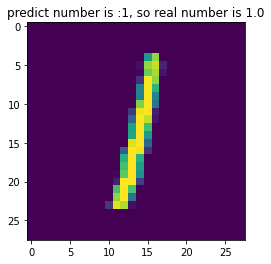

In [81]:
# some_digit.reshape(28, 28)
some_number= (X_test[number_rand]/255.0).reshape(28,28)
some_number1 = X_test_t[number_rand].float()
output = nn_my(some_number1.view(-1,784)) 
pred = output[0]
index_is = torch.argmax(pred)
plt.title(f"predict number is :{index_is}, so real number is {y_test[number_rand]}")
plt.imshow(some_number)
plt.show()


#So today we have done here